**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

*All the text in italics is instructions for filling the template - remove when writing the project report!*

# *Title* 

*Title should be concise and informative, describes the approach to solve the problem. Some good titles from previous years:*

*- Comparing extreme learning machines and naive bayes’ classifier in spam detection*

*- Using linear discriminant analysis in spam detection*

*Some not-so-good titles:*

*- Bayesian spam filtering with extras*

*- Two-component classifier for spam detection*

*- CS-E3210 Term Project, final report*




## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*



## 1. Introduction

*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*



## 2. Data analysis

*Briefly describe data (class distribution, dimensionality) and how will it affect
classification. Visualize the data. Don’t focus too much on the meaning of the features,
unless you want to.*

*- Include histograms showing class distribution.*



(2181, 264)


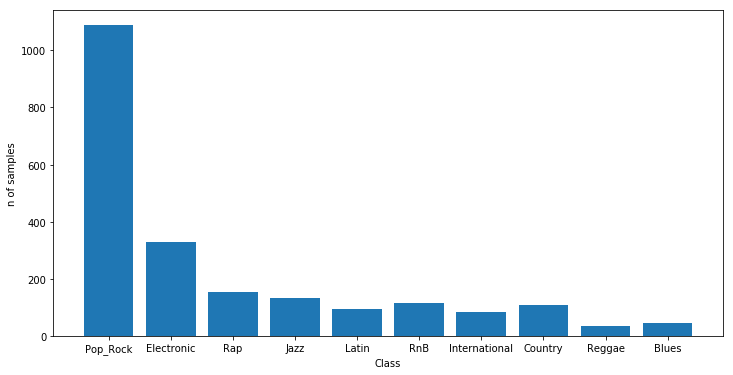

In [206]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

test_data = pd.read_csv("./test_data.csv").values
train_data = pd.read_csv("./train_data.csv").values
train_labels = pd.read_csv("./train_labels.csv").values

# Use every second item of train_data as confirmation data set and every second as training set
scaler.fit(train_data[::2])
confirm_set = scaler.transform(train_data[::2])
confirm_labels = np.ravel(train_labels[::2])
train_set = scaler.transform(train_data[1::2])
train_labels = np.ravel(train_labels[1::2])


classes = [
    "Pop_Rock",
    "Electronic",
    "Rap",
    "Jazz",
    "Latin",
    "RnB",
    "International",
    "Country",
    "Reggae",
    "Blues"
]
unique, counts = np.unique(train_labels, return_counts=True)
print(train_set.shape)
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
hist = ax.bar(classes, counts)
ax.set_xlabel("Class")
ax.set_ylabel("n of samples")
plt.show()

In [236]:
# Load the data and cleanup

# CLF.fit Takes to parameters data X shape(n_samples, n_features) and labels Y shape(n_samples
def train_clf_with_params(alpha, hidden_layer_sizes, random_state, X, Y):
    clf = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, random_state=random_state, shuffle=True)
    clf.fit(X, Y)
    return clf

def test_clf(clf, X, Y_true):
    Y_pred = clf.predict(X)
    score = clf.score(X, Y_true)
    Y_pred_proba = clf.predict_proba(X)
    print("Score: " + str(score))
    loss = log_loss(Y_true, Y_pred_proba)
    print("Log Loss: " + str(loss))
    return (score, loss)
    
    
    

In [240]:
#Analysis of the input data
# ...

mean = int(np.mean([train_set.shape[1], 10]))
# TEST MLC
data = np.random.randint(train_set.shape[1], size=100)
data = np.hstack([data, mean])
best_loss = 100
best_score = 100
best_val = 0
for i in data:
    tup = (i, )
    clf = train_clf_with_params(1e-5, tup, 1, train_set, train_labels)
    score, loss = test_clf(clf, confirm_set, confirm_labels)
    if ((score < best_score) & (best_loss > loss)):
        best_loss = loss
        best_score = score
        best_val = tup
print("LOSS " + str(best_loss))
print("SCORE " + str(best_score))
print("VALUE " + str(best_val))

Score: 0.579092159559835
Log Loss: 7.19328097769484
Score: 0.5933058230169647
Log Loss: 7.263376395274322
Score: 0.5818431911966988
Log Loss: 7.519201554388124
Score: 0.5653370013755158
Log Loss: 9.424112636867326
Score: 0.5653370013755158
Log Loss: 8.091296125826172
Score: 0.5887207702888583
Log Loss: 7.098345106874916
Score: 0.5795506648326456
Log Loss: 7.450960074094607
Score: 0.5873452544704264
Log Loss: 7.089922211681097
Score: 0.5332416322787712
Log Loss: 11.846310177108904
Score: 0.584135717560752
Log Loss: 7.824602175887885
Score: 0.5813846859238881
Log Loss: 7.4409634275293035
Score: 0.5708390646492435
Log Loss: 7.462631380013403
Score: 0.584135717560752
Log Loss: 7.271207791951658
Score: 0.5781751490142136
Log Loss: 7.688341615248855
Score: 0.5855112333791839
Log Loss: 7.315099885269148
Score: 0.5795506648326456
Log Loss: 7.6298425292833
Score: 0.5891792755616689
Log Loss: 6.08436713155127
Score: 0.5919303071985328
Log Loss: 7.33643379919162
Score: 0.5868867491976157
Log Loss

## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*



In [4]:
# Trials with ML algorithms

## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*



In [5]:
#Confusion matrix ...

## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *